# Simple Model: Linear Regression and Logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

## Linear Regression as simple neural network

Assume that we have three predictors $x_1, x_2, x_3$ which we here often call __input__. Our __output__, that is the value we want to predict, is a continuous variable. Then Linear Regression is a model that predcit the ouput using the formula:

$$y = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$

We can plot it in the following way.

![Simple Neuron 0](docs/pngs/linreg1.png)

Now if we look at Logistic Regression we can represent it in a similar way. Recall that output is a probablity and can be written as. 

$$y = f(w_1 x_1 + w_2 x_2 + w_3 x_3 + b)$$

where $f$ here is the sigmoid function given by formula:

$$f(x) = \frac{1}{1 + \exp(-x)}.$$

Then we can represent it as

![Simple Neuron 1](docs/pngs/logreg1.png)

We call $f$ by __activation function__ since it relates to __perceptron__, a mathematical model of a neuron. We can think about inputs as signals that a perceptron receives. Then preceptron pust them all together and $f$ activates that is take a decision if the sample belongs to the traget class or not. 

Often we simplify this picture by ploting is as

![Simple Neuron 2](docs/pngs/logreg2.png)

### Acivations

We can have many different activations. Let us list the most popular ones.


#### Sigmoid

This one we have already seen.

$$f(x) = \frac{1}{1+\exp(-x)}.$$

Let's plot it.

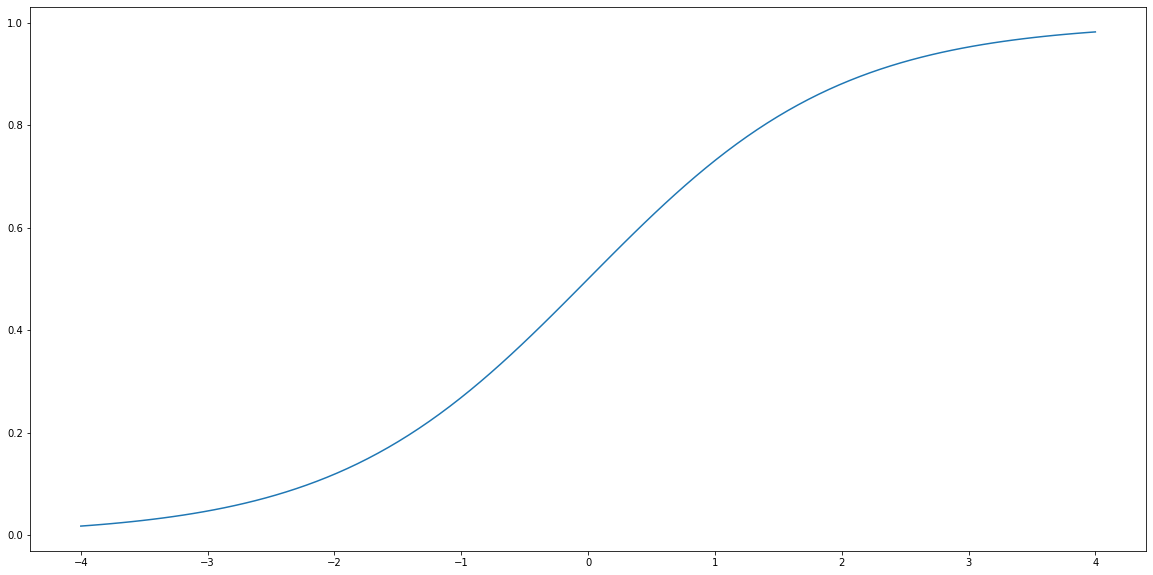

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


x = np.linspace(-4, 4, 100)
plt.plot(x, sigmoid(x))
plt.show()

#### Identity

We can see Linear Regression as perceptron with identity activation. That is

$$f(x) = x.$$

#### Hyperbolic tangent

This one is very popular when we need an oputput that is a number between $(-1, 1)$.

$$f(x) = \frac{2}{1 + \exp(-2x)} - 1$$

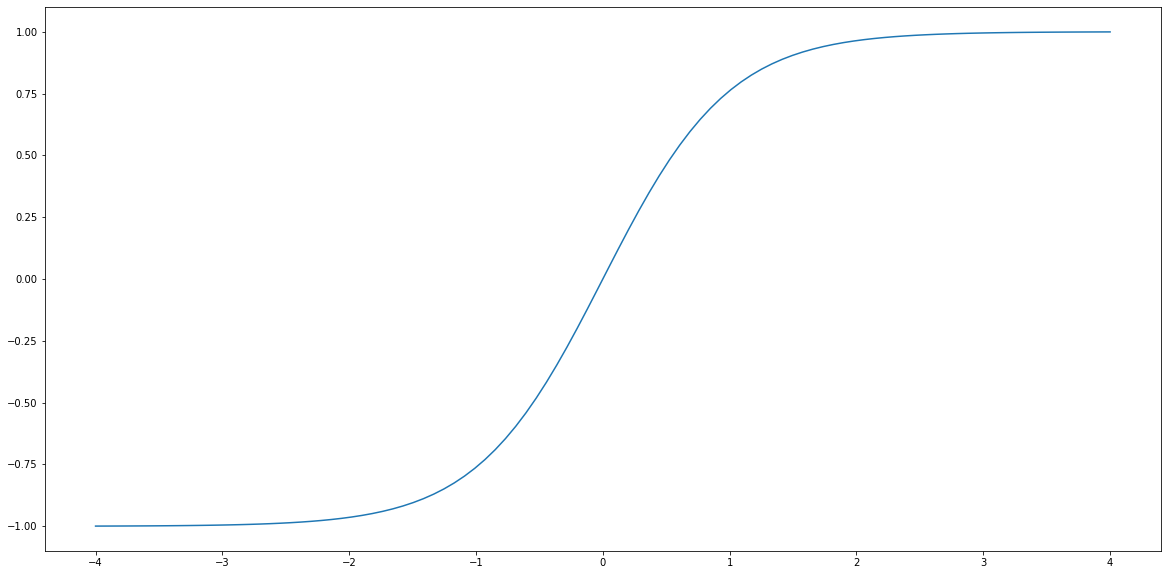

In [4]:
def tanh(x):
    return 2/(1 + np.exp(-2* x)) - 1

plt.plot(x, tanh(x))
plt.show()

### ReLU

$$f(x) = \left\{ \begin{array}{lll} 0 & \textrm{for} & x < 0\\ x & \textrm{for} & x \geq 0 \end{array}\right.$$

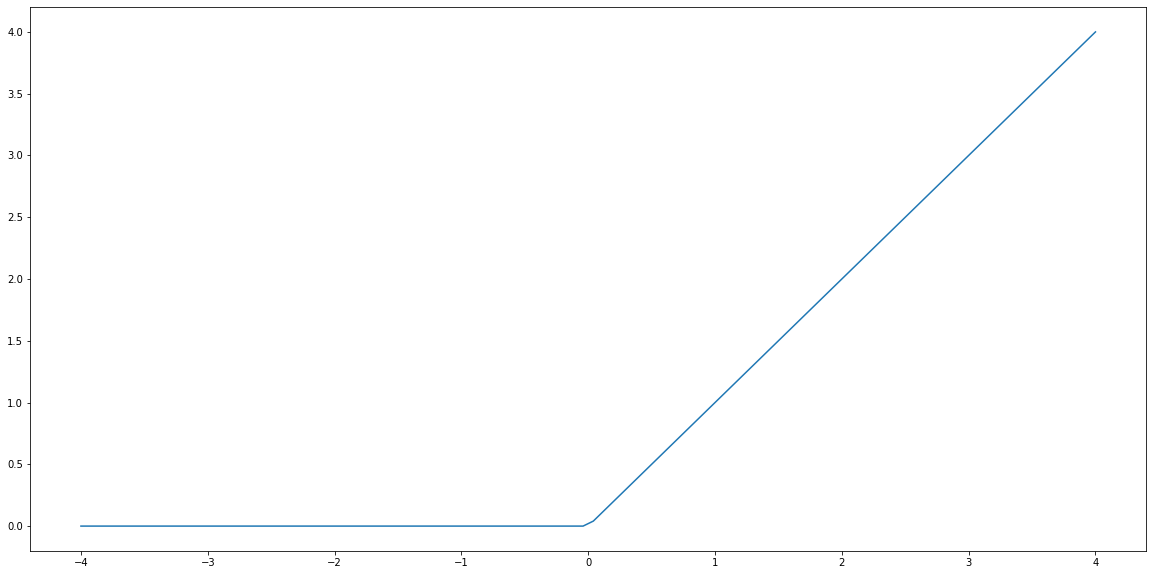

In [5]:
def relu(x):
    return (x >= 0) * x

plt.plot(x, relu(x))
plt.show()

### Neural Network

The neural network is a structure that joins together perceptrons. Here we can see an example of it.

![Simple Neuron 2](docs/pngs/nn.png)



## How we train neural network

After we have created neural network its weights are initialized randomly. Then we need to train the network. We do this by repeating the following steps.

1. Forward pass
2. Calculate loss
3. Backpropagate erros: calculate gradients
4. Update weights

Let us expalain them now. 

### 1. Forward pass

Here we claculate outcome of the network. That is using the inputs values we calculate our predictions.

### 2. Calculate loss

Having real and predicted values we calculate loss. What is loss. It is similar to the measure of the errors. However, due to the way we update our weights (see below) this function has to be differentable or differentiable in all points except as little points as possible. 

Let us list the most important loss functions.

#### MSE

This is the one you vary likely to know. If $y_i$ are the real values and $\hat{y}_i$ are predicted, then

$$MSE(y, \hat{y}) = \frac{1}{N}\sum_i^N (y_i - \hat{y}_i)^2.$$

#### Binary cross entropy

This one is used whan we have binary classification problem. Here $y_i \in \{0, 1\}$ and $\hat{y}_i$ is predicted probablity that the output belongs to target class. Then __binary cross entropy__ is definied by:

$$bce(y, \hat{y}) = -\sum_{i} \big(y_i \log(\hat{y}_i) + (1- y_i) \log(1-\hat{y}_i)\big).$$

#### Cross entropy

This is used when we have more than one class. Let assume that we have $j=1,\ldots, K$ classes and $y_{i,j}$ is one-hot-encodig of the outcome. That is $y_{i,j}$ is one if outcome is class $j$ and 0 otherwise. And let 
$\hat{y}_{i, j}$ be the predicted probablity that the sample $i$ belongs to class $j$. Then

$$bce(y, \hat{y}) = -\sum_{i} \sum_j y_{i, j} \log(\hat{y}_{i, j}).$$

### 3. Backpropagate erros

Next we calculate partial derivatives of the loss function with respect to weithgs. The vector of these derivaties is called __gradient__. We do not enter into details with it. It is enought to know that the vector oposite to the gradient point into direction in wich we have to correct the weights in order to impreve the performance of our neural netwoerk.

### 4. Update weights using optimizer

Here we are describe how __gradient descent__ optimizer works. It works by updating weights by substructing a fraction of the derivate from it. How much of it? It is another parameter called __learning rate__. So if the weight was $w_i$ and the partial derivative of the loss function $L$ with respect to $w_i$ is 

$$\frac{\partial L}{\partial w_i}$$

and the learing rate is $r$ then new weight is

$$w_i - r \frac{\partial L}{\partial w_i}.$$

In practice we use a modification of this method that is called __Adam__.

## Example: Boston dataset

Here we are going to train a simple Linear Regression in two ways. Using `sklearn` library and then using `pytorch`. First one represent standard way of dealong with neural networks. The second one will follow the steps of traing a neural network model.

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

Frist we take one column:
* % lower status of the population

And recall that the target is __Median value of houses__

In [7]:
X = boston.data[:, [12]]
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.1)

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

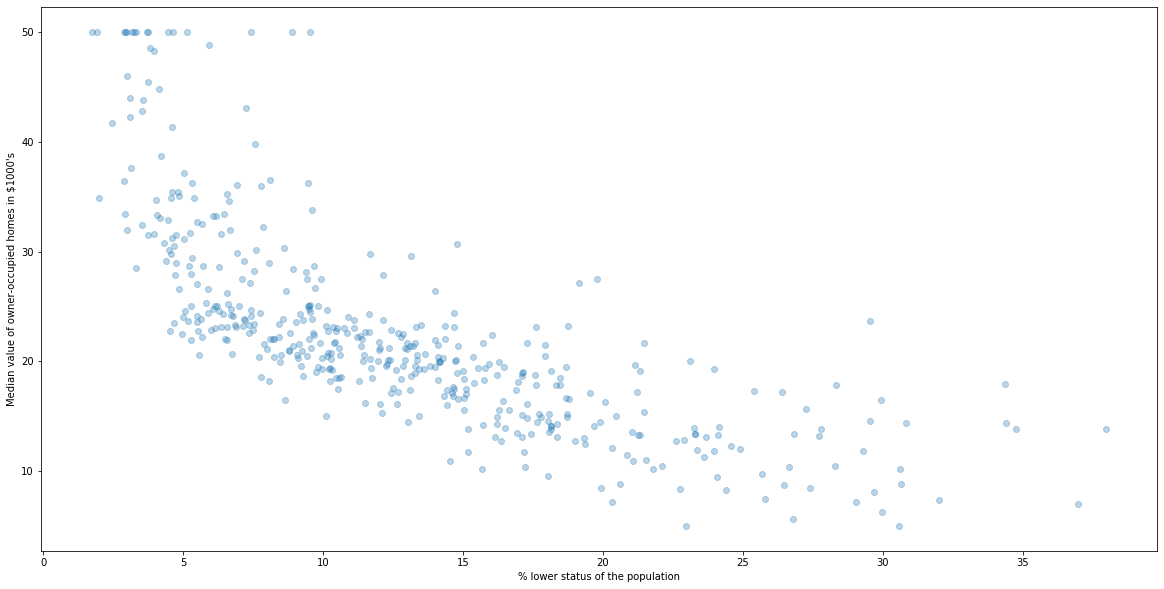

In [8]:
plt.scatter(X_train[:,0], y_train, alpha=0.3)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")

### Sklearn model

In [9]:
from sklearn.linear_model import LinearRegression

skl_model = LinearRegression()
skl_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

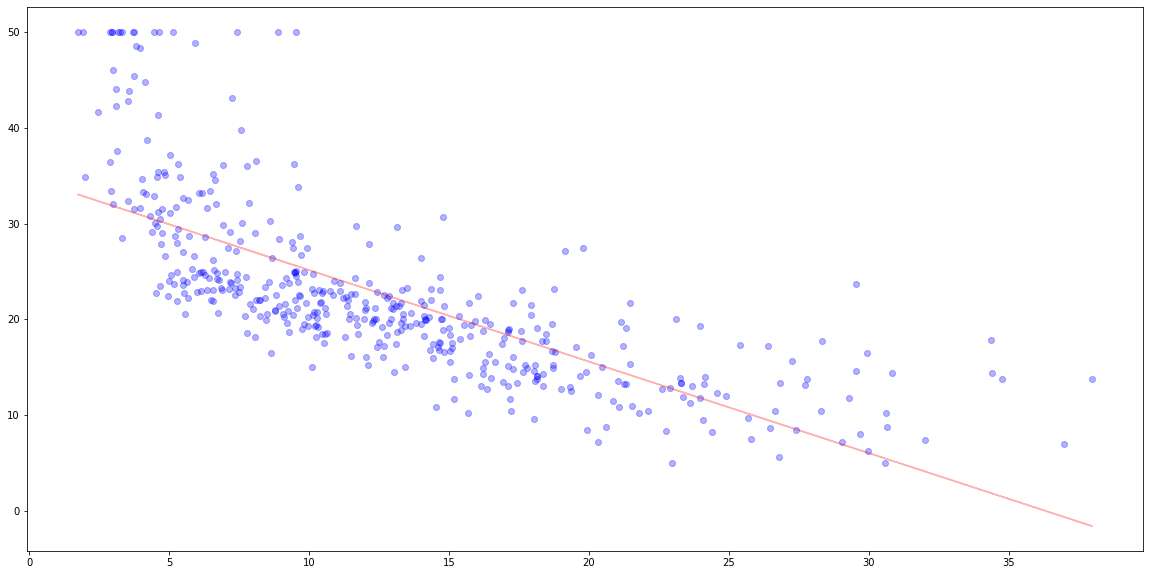

In [10]:
y_train_hat = skl_model.predict(X_train)
y_test_hat = skl_model.predict(X_test)

# Ploting real data y (blue)
plt.scatter(X_train[:,0], y_train, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.plot(X_train[:,0], y_train_hat, alpha=0.3, c="red")
plt.show()

Let's see its parameters.

In [11]:
skl_model.coef_, skl_model.intercept_

(array([-0.95515174]), 34.706616811324174)

And its error.

In [12]:
from sklearn.metrics import mean_squared_error
np.sqrt(np.sqrt(mean_squared_error(y_test, y_test_hat)))

2.3592842618790386

### Pytorch model

Now let's do the same with a pytorch. Firstt we have to translate `numpy` obejcts into `pytorch` obejcts.

In [13]:
# translate numpy to torch's objects
def torch_X_y(X_train, X_test, y_train, y_test):
    X_train_torch = torch.from_numpy(X_train).float()
    X_test_torch = torch.from_numpy(X_test).float()
    y_train_torch = torch.tensor(y_train).float()
    y_test_torch = torch.tensor(y_test).float()
    return X_train_torch, X_test_torch, y_train_torch, y_test_torch
    
X_train_torch, X_test_torch, y_train_torch, y_test_torch = torch_X_y(X_train, X_test, y_train, y_test)

### Define Model

Let's define the model

In [14]:
# predefined linear model (no activation funcion)
model = nn.Linear(in_features=1, out_features=1, bias=True)

At the begnining its weights and bias is random

In [15]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.3452]], requires_grad=True), Parameter containing:
 tensor([-0.5068], requires_grad=True))

Now let's choose the __loss fuction__ and the optimizer. We will choose __mean square error__ for the loss and __Adam__ as optimizer.

In [16]:
### Choose loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

### Let's update weights

In [17]:
# Zero gradients (just in case)
optimizer.zero_grad()

# Forward pass, calculate predictions
y_train_hat = model(X_train_torch)

#### Calculate loss

__Achtung__ Output is two dimensional so we have to `unsueeze` our target.

In [18]:
y_train_hat[:5]

tensor([[-2.8125],
        [-5.1458],
        [-5.4323],
        [-4.1621],
        [-5.8120]], grad_fn=<SliceBackward>)

In [19]:
y_train_torch.unsqueeze(1)[:5]

tensor([[32.0000],
        [15.0000],
        [20.3000],
        [20.6000],
        [20.4000]])

In [20]:
loss = loss_function(y_train_hat, y_train_torch.unsqueeze(1))

#### Weights before

In [21]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.3452]], requires_grad=True), Parameter containing:
 tensor([-0.5068], requires_grad=True))

#### Weights after

In [22]:
## Backward propagation
loss.backward()
model.weight, model.bias

(Parameter containing:
 tensor([[-0.3452]], requires_grad=True), Parameter containing:
 tensor([-0.5068], requires_grad=True))

In [23]:
## Upade weights
optimizer.step()
model.weight, model.bias

(Parameter containing:
 tensor([[-0.2452]], requires_grad=True), Parameter containing:
 tensor([-0.4068], requires_grad=True))

## Put it into loop 

In [24]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

n_epoch = 10000

for i in range(n_epoch):
   # Zero gradients (just in case)
    optimizer.zero_grad()

    # Forward pass, calculate predictions
    y_train_hat = model(X_train_torch) 
    # Calculate loss
    loss = loss_function(y_train_hat, y_train_torch.unsqueeze(1))
    ## Backward propagation
    loss.backward()
    ## Upade weights
    optimizer.step()

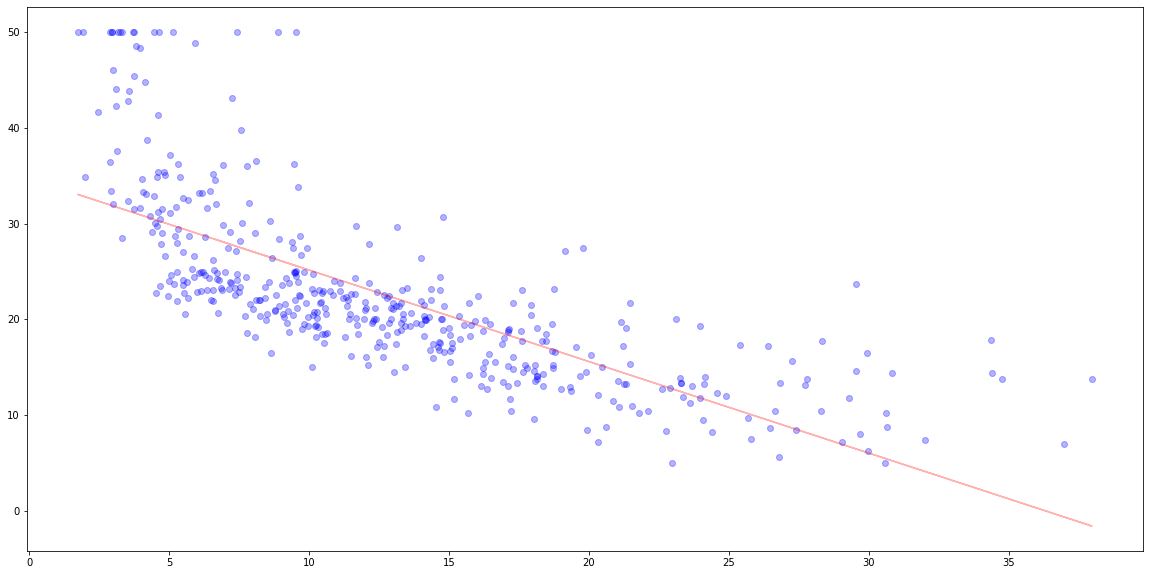

In [25]:
y_train_hat = model(X_train_torch).squeeze().detach().numpy()
y_test_hat = model(X_test_torch).squeeze().detach().numpy()
# Ploting real data y (blue)
plt.scatter(X_train[:,0], y_train, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.plot(X_train, y_train_hat, alpha=0.3, c="red")
plt.show()

In [26]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.9551]], requires_grad=True), Parameter containing:
 tensor([34.7066], requires_grad=True))

In [27]:
np.sqrt(np.sqrt(mean_squared_error(y_test, y_test_hat)))

2.359285237543237

## Using all variables and scale them

In [28]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_s = scaler_X.fit_transform(X)
y_s = scaler_y.fit_transform(y.reshape(-1, 1))
X_torch = torch.from_numpy(X_s).float()
y_torch = torch.from_numpy(y_s[:, 0]).float()

In [29]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

n_epoch = 10000

for i in range(n_epoch):
   # Zero gradients (just in case)
    optimizer.zero_grad()

    # Forward pass, calculate predictions
    output = model(X_torch) 
    # Calculate loss
    loss = criterion(output, y_torch.unsqueeze(1))
    ## Backward propagation
    loss.backward()
    ## Upade weights
    optimizer.step()

In [30]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.7372]], requires_grad=True), Parameter containing:
 tensor([0.0074], requires_grad=True))

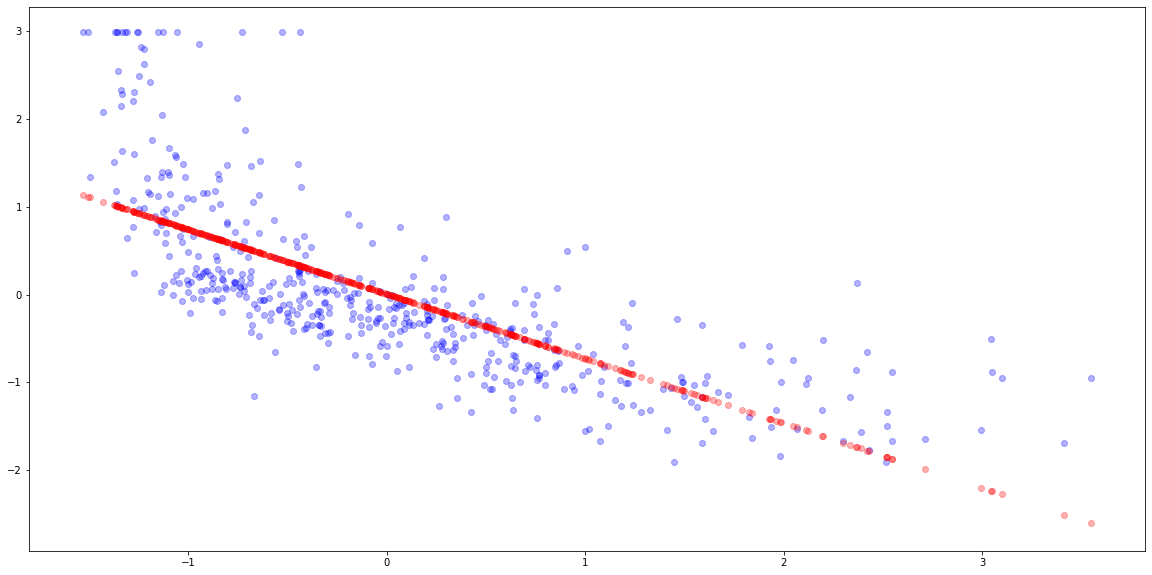

In [31]:
y_hat = model(X_torch).squeeze().detach().numpy()
# Ploting real data y (blue)
plt.scatter(list(X_s[:,0]), list(y_s), alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.scatter(list(X_s[:,0]), list(y_hat), alpha=0.3, c="red")

## Logistic Regression

Text(0.5, 0, "Median value of owner-occupied homes in $1000's")

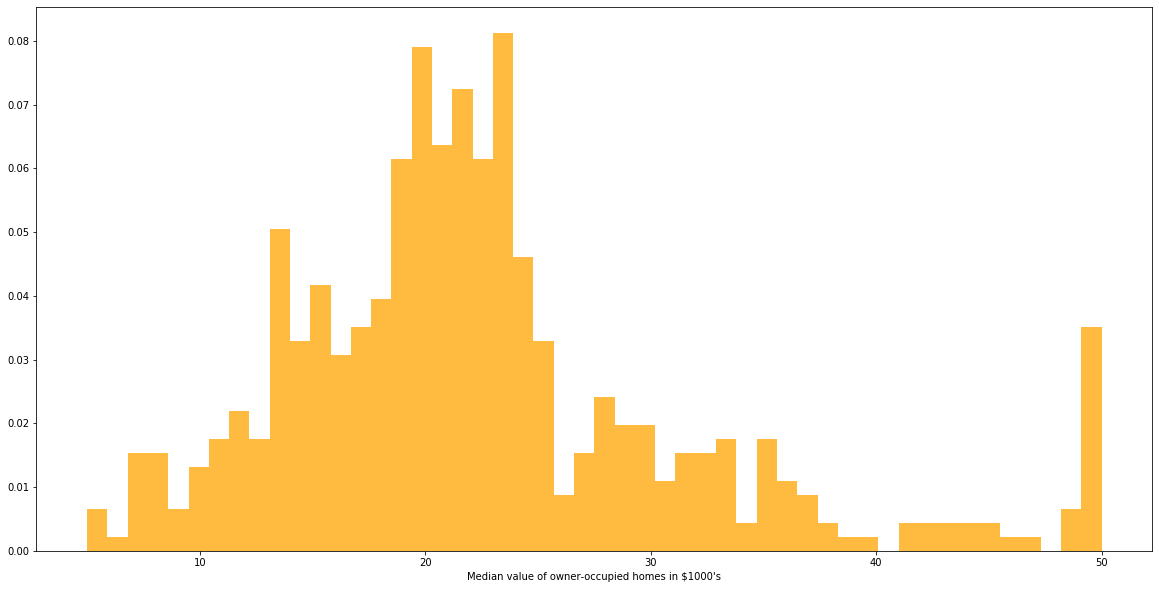

In [32]:
n, bins, patches = plt.hist(y, 50, density=1, facecolor='orange', alpha=0.75)
plt.xlabel("Median value of owner-occupied homes in $1000's")

In [33]:
# 1. Prepare data
X = boston.data[:, [0, 12]]
y = boston.target > 25 # if a meadian house value is greater then 25k

In [34]:
import pandas as pd
# just for showing data
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['expensive'] = y
df.head()

,CRIM,LSTAT,expensive
0,0.00632,4.98,False
1,0.02731,9.14,False
2,0.02729,4.03,True
3,0.03237,2.94,True
4,0.06905,5.33,True


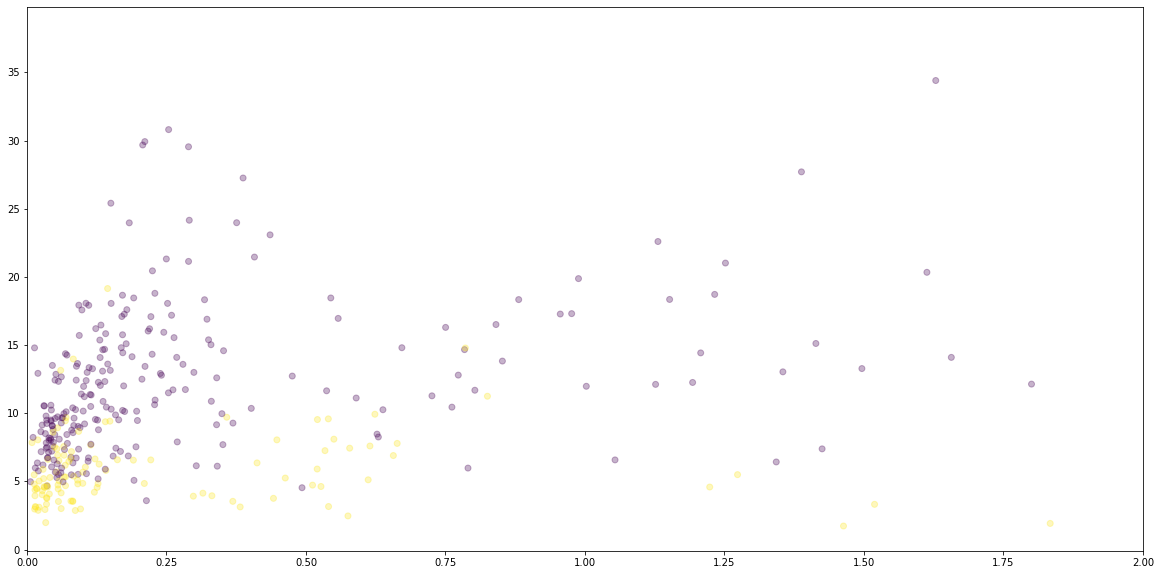

In [35]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
plt.xlim(0, 2)
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(penalty='none', solver="newton-cg")
logreg_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_hat = logreg_model.predict(X)
y_proba = logreg_model.predict_proba(X)[:, 1]

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification(y, y_hat, y_proba):
    return {
        "Accuracy": accuracy_score(y, y_hat),
        "Precision": precision_score(y, y_hat),
        "Recall": recall_score(y, y_hat),
        "F1-score": f1_score(y, y_hat),
        "AUC": roc_auc_score(y, y_proba),
    }

evaluate_classification(y, y_hat, y_proba)

{'Accuracy': 0.8636363636363636,
 'Precision': 0.7350427350427351,
 'Recall': 0.6935483870967742,
 'F1-score': 0.7136929460580913,
 'AUC': 0.912324776220233}

## Logistic regression: the simples NN

In [39]:
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y.astype(float)).float()

In [40]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc', nn.Linear(in_features=2, out_features=1, bias=True)),
                      ('sigmoid', nn.Sigmoid())]))

In [42]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [43]:
n_epoch = 10000

for i in range(n_epoch):
   # Zero gradients (just in case)
    optimizer.zero_grad()

    # Forward pass, calculate predictions
    output = model(X_torch) 
    # Calculate loss
    loss = criterion(output, y_torch.unsqueeze(1))
    ## Backward propagation
    loss.backward()
    ## Upade weights
    optimizer.step()

In [44]:
model.fc.weight

Parameter containing:
tensor([[ 0.0261, -0.4960]], requires_grad=True)

In [45]:
y_proba = model(X_torch).squeeze().detach().numpy()
y_hat = y_proba > 0.5

In [46]:
evaluate_classification(y, y_hat, y_proba)

{'Accuracy': 0.8636363636363636,
 'Precision': 0.7350427350427351,
 'Recall': 0.6935483870967742,
 'F1-score': 0.7136929460580913,
 'AUC': 0.9122192197263975}

In [47]:
logreg_model.coef_, model.fc.weight

(array([[ 0.02477726, -0.49706106]]), Parameter containing:
 tensor([[ 0.0261, -0.4960]], requires_grad=True))